In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,BaggingRegressor,ExtraTreesRegressor,HistGradientBoostingRegressor
from sklearn.svm import LinearSVR
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('possum.csv')
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [4]:
df.shape

(104, 14)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
case,104.0,52.500000,30.166206,1.0,26.750,52.50,78.250,104.0
site,104.0,3.625000,2.349086,1.0,1.000,3.00,6.000,7.0
age,102.0,3.833333,1.909244,1.0,2.250,3.00,5.000,9.0
hdlngth,104.0,92.602885,3.573349,82.5,90.675,92.80,94.725,103.1
skullw,104.0,56.883654,3.113426,50.0,54.975,56.35,58.100,68.6
totlngth,104.0,87.088462,4.310549,75.0,84.000,88.00,90.000,96.5
taill,104.0,37.009615,1.959518,32.0,35.875,37.00,38.000,43.0
footlgth,103.0,68.459223,4.395306,60.3,64.600,68.00,72.500,77.9
earconch,104.0,48.130769,4.109380,40.3,44.800,46.80,52.000,56.2
eye,104.0,15.046154,1.050374,12.8,14.400,14.90,15.725,17.8


In [6]:
df.isnull().mean()*100

case        0.000000
site        0.000000
Pop         0.000000
sex         0.000000
age         1.923077
hdlngth     0.000000
skullw      0.000000
totlngth    0.000000
taill       0.000000
footlgth    0.961538
earconch    0.000000
eye         0.000000
chest       0.000000
belly       0.000000
dtype: float64

In [7]:
df.footlgth.fillna(df.footlgth.mean(),inplace=True)
df.age.fillna(df.age.mean(),inplace=True)
df

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [8]:
df.isnull().mean()*100

case        0.0
site        0.0
Pop         0.0
sex         0.0
age         0.0
hdlngth     0.0
skullw      0.0
totlngth    0.0
taill       0.0
footlgth    0.0
earconch    0.0
eye         0.0
chest       0.0
belly       0.0
dtype: float64

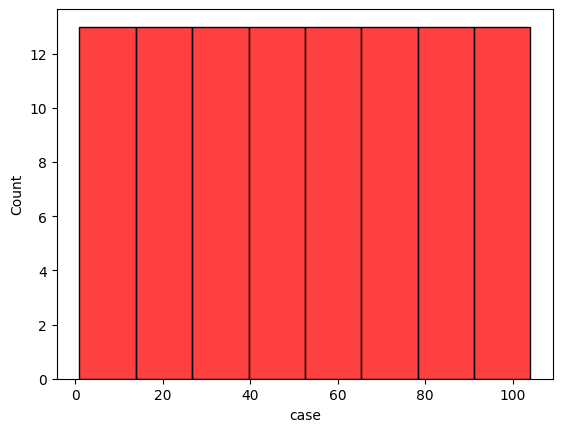

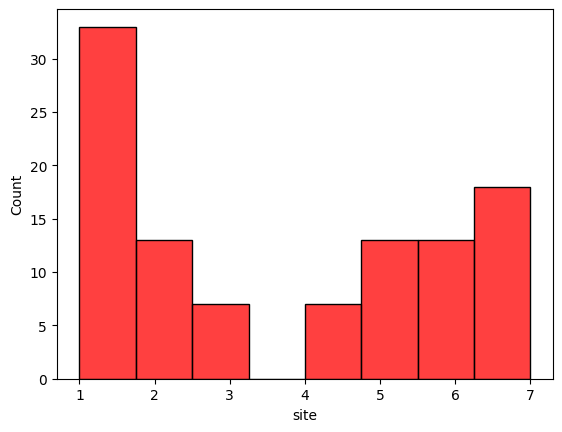

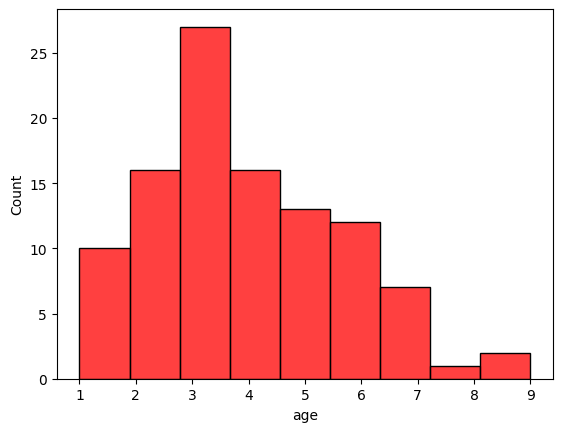

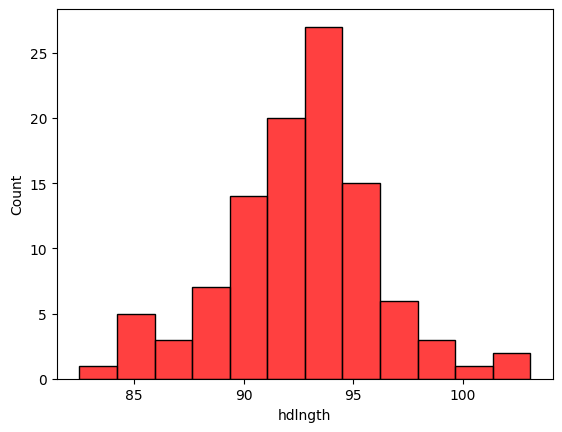

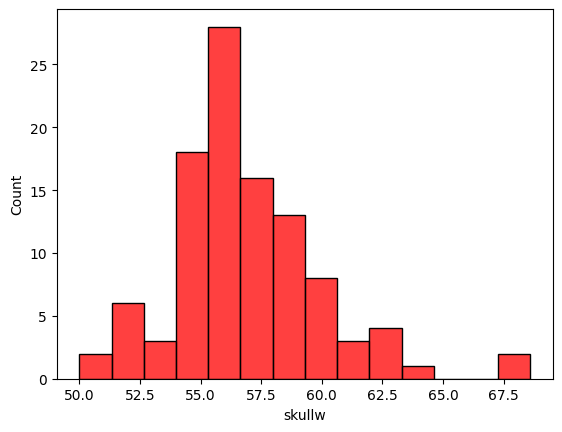

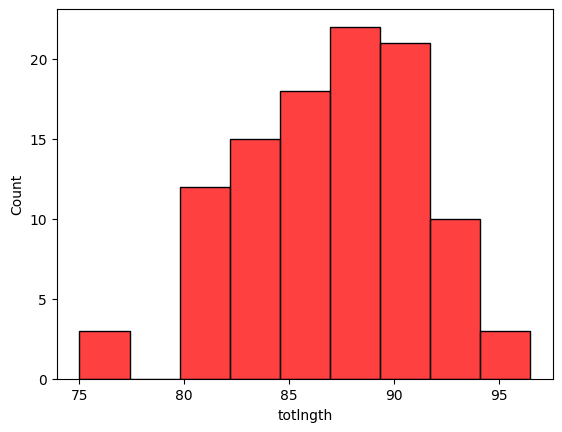

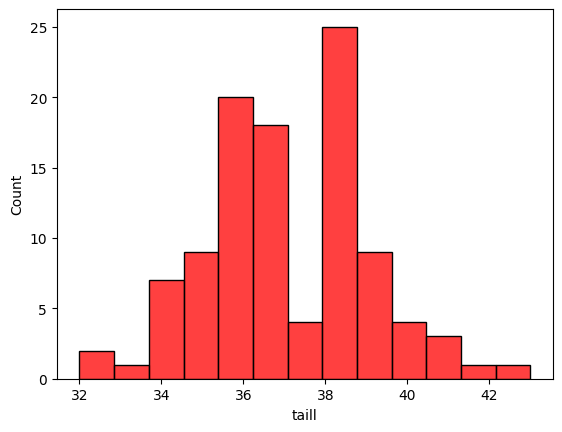

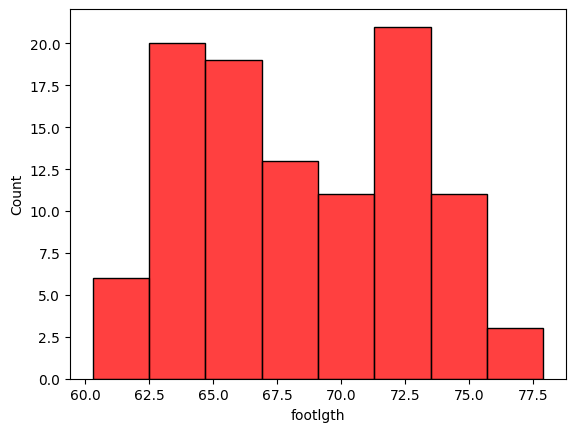

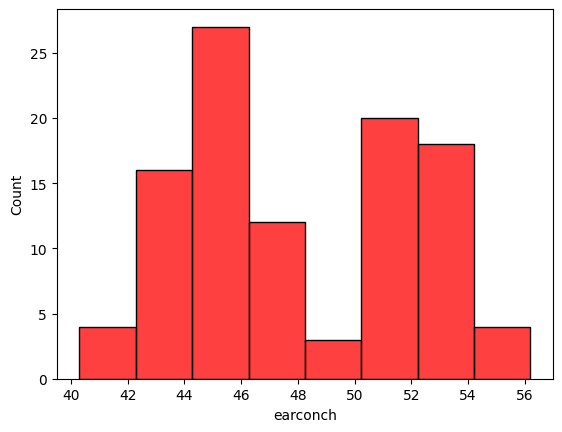

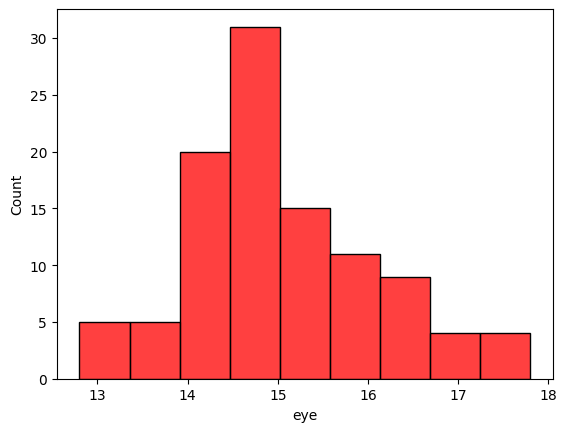

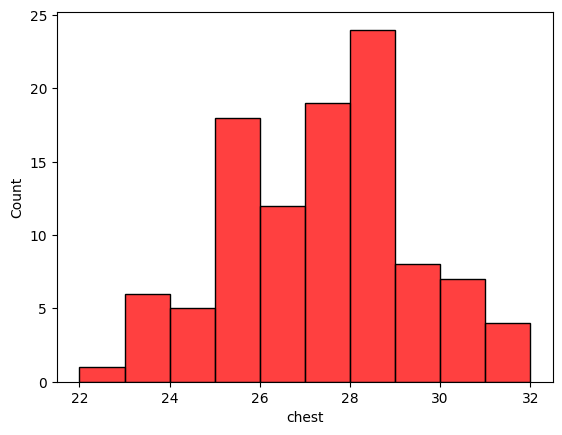

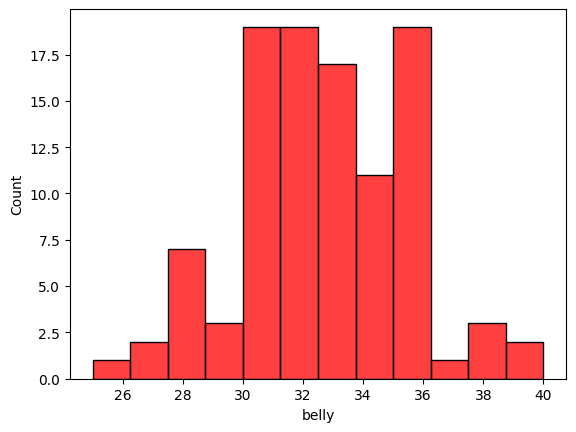

In [9]:
for i in df.columns:
    if df[i].dtype!="object":
        sns.histplot(x=df[i],color="red")
        plt.show()

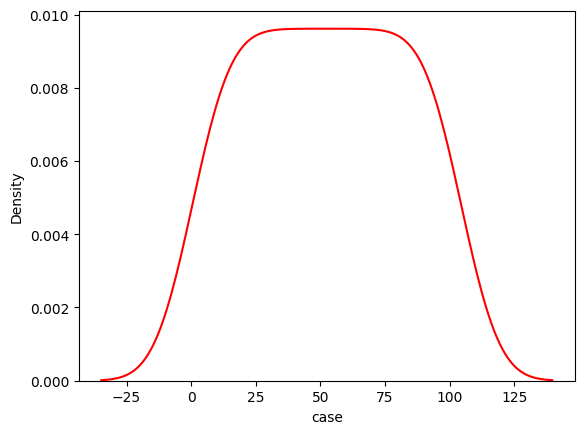

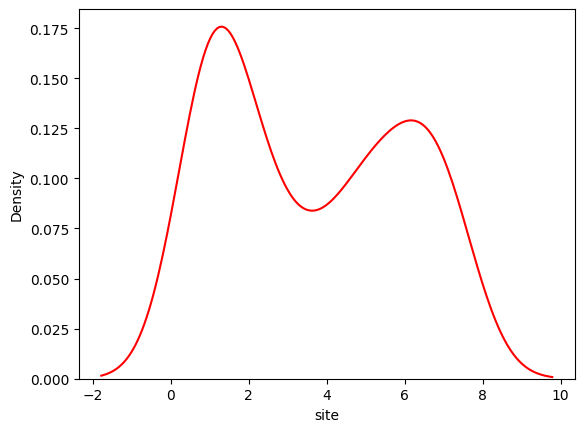

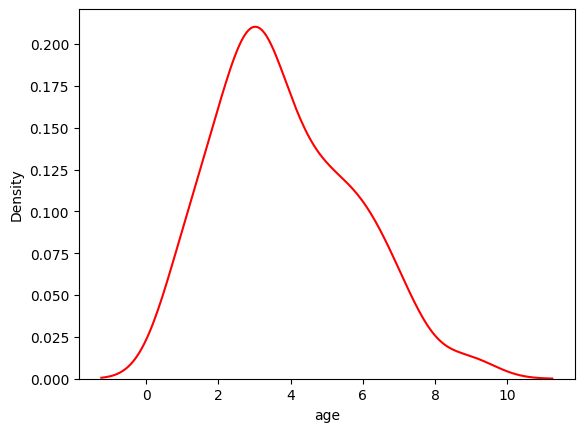

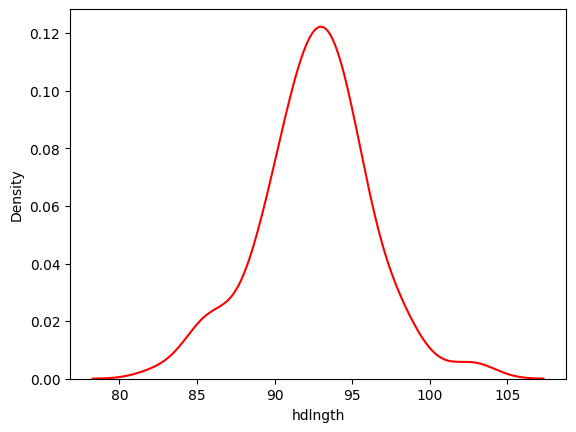

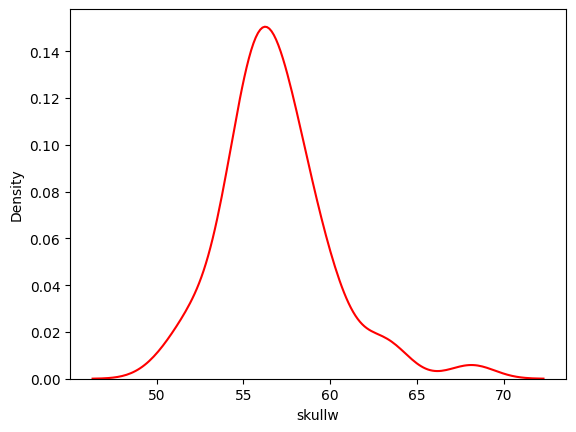

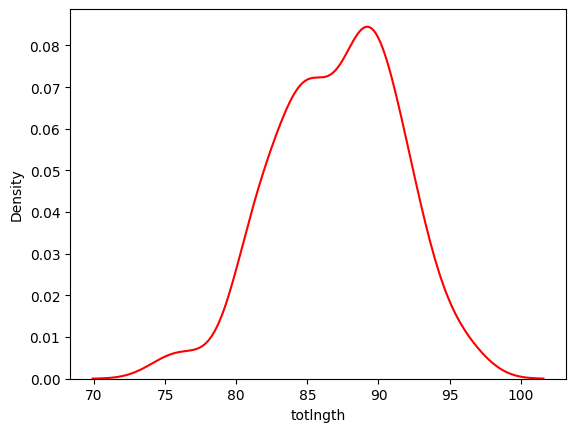

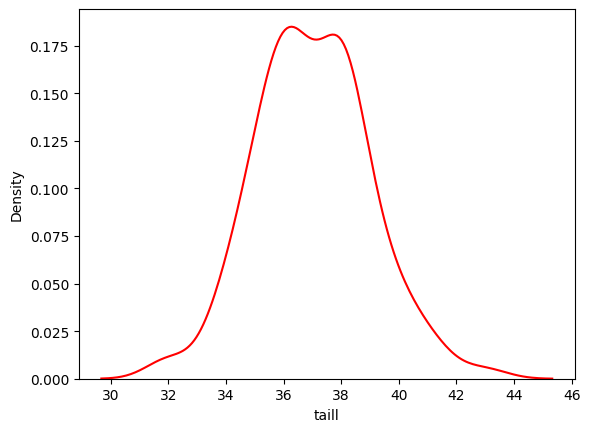

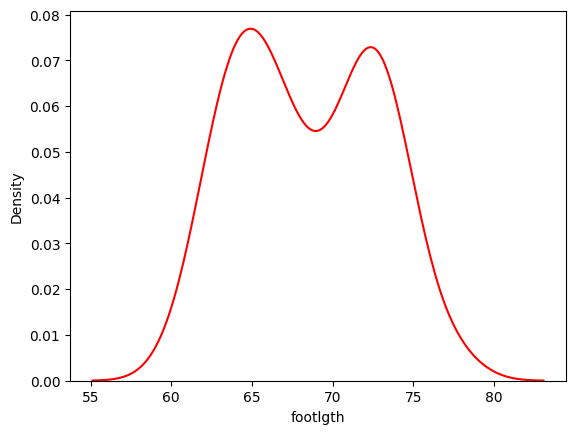

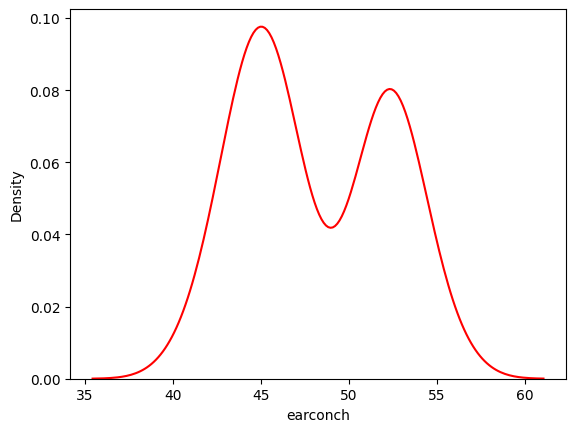

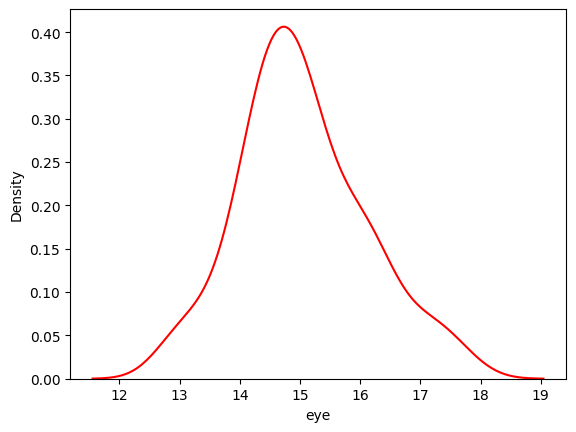

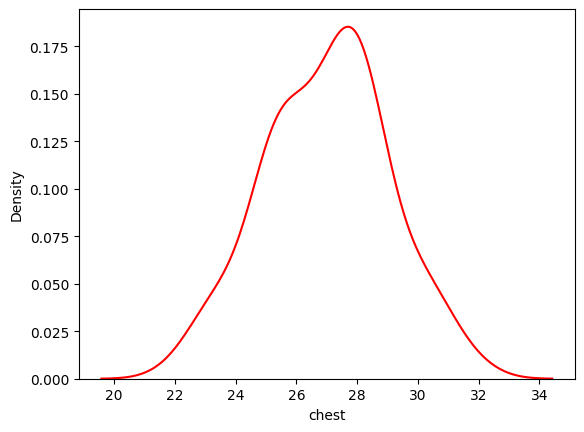

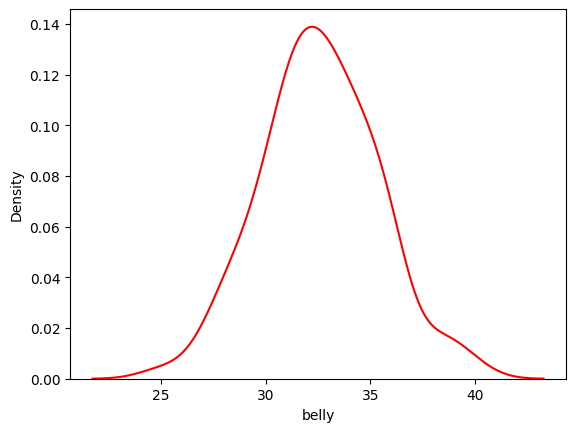

In [10]:
for i in df.columns:
    if df[i].dtype!="object":
        sns.kdeplot(x=df[i],color="red")
        plt.show()

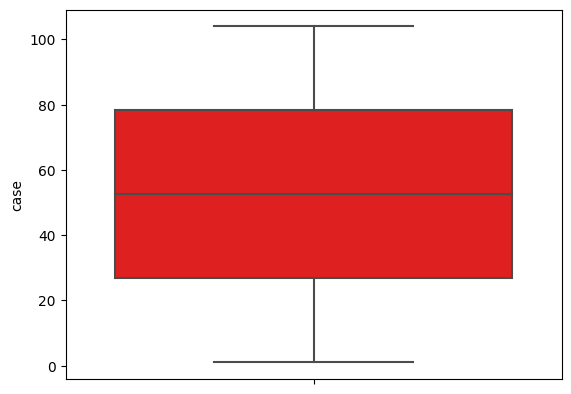

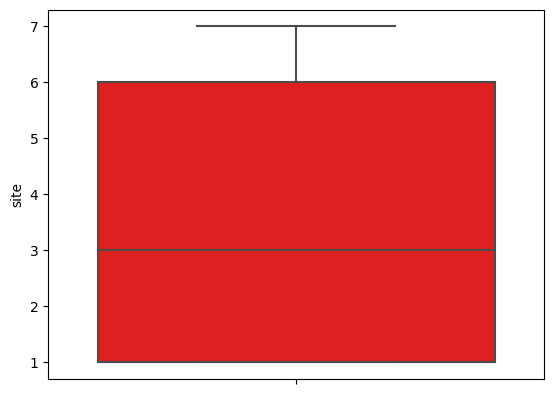

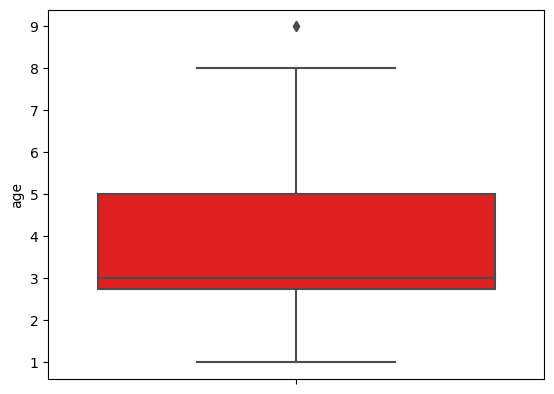

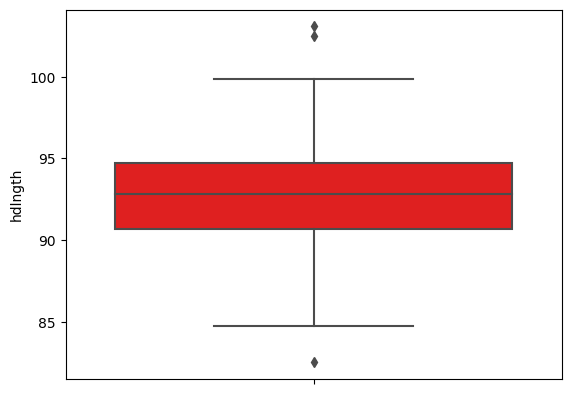

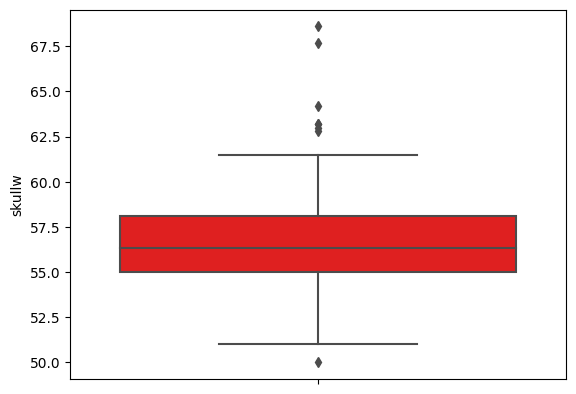

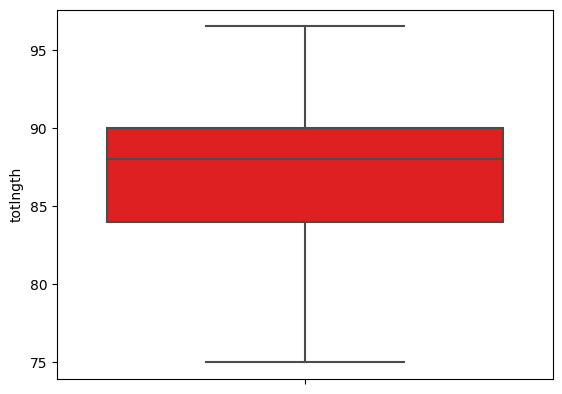

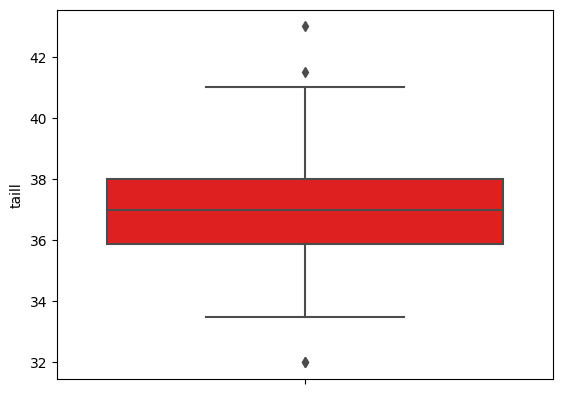

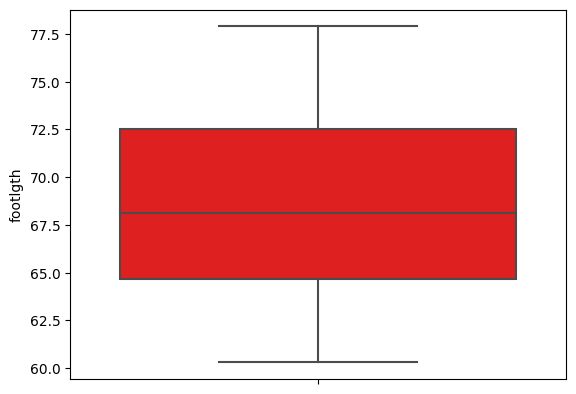

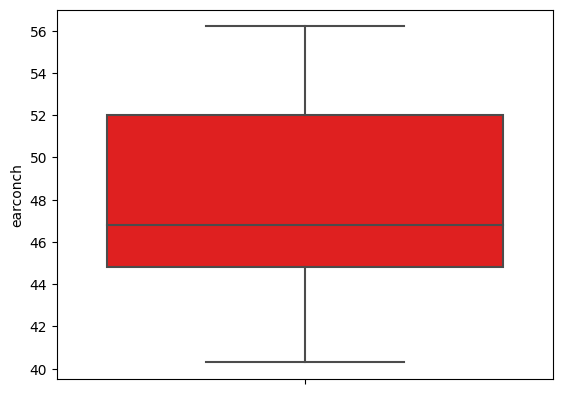

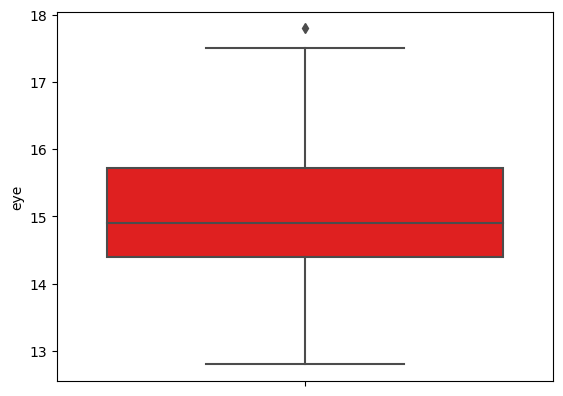

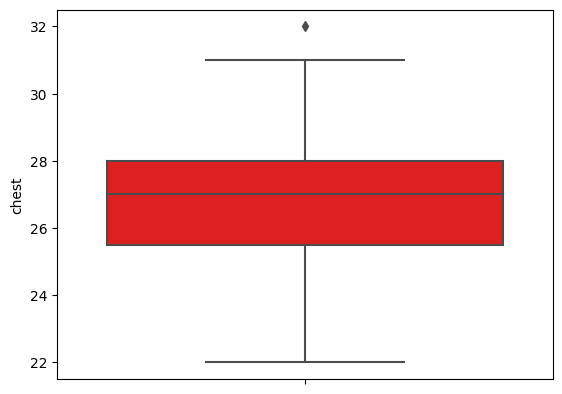

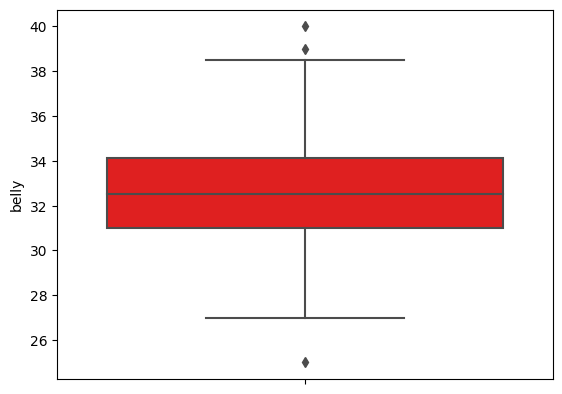

In [11]:
for i in df.columns:
    if df[i].dtype!="object":
        sns.boxplot(y=df[i],color="red")
        plt.show()

### multivariate analysis

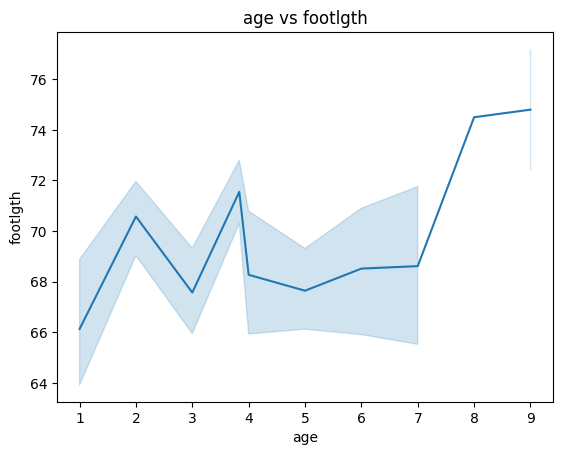

In [12]:
sns.lineplot('age','footlgth',data=df)
plt.title("age vs footlgth")
plt.show()

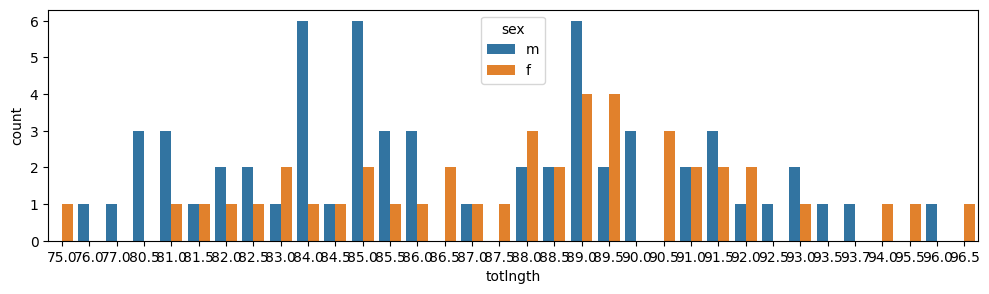

In [13]:
plt.figure(figsize=(12,3))
sns.countplot('totlngth',hue='sex',data=df)
plt.show()

In [14]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile(col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL,LL

In [15]:
for i in df.columns:
        if df[i].dtype != 'object':
            UL,LL=outlier_limit(df[i])
            df[i]=np.where((df[i]>UL)|(df[i]<LL),np.nan,df[i])

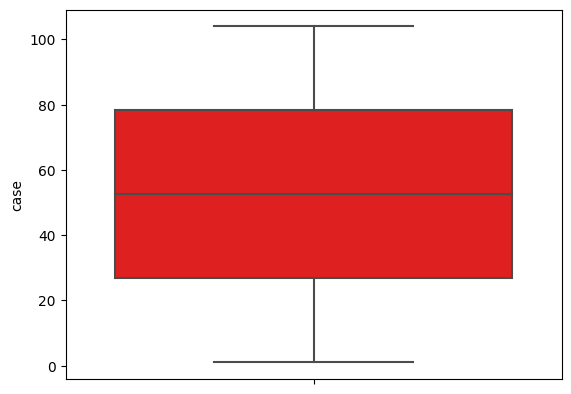

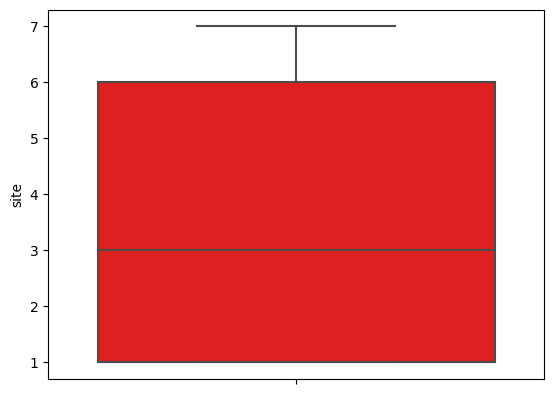

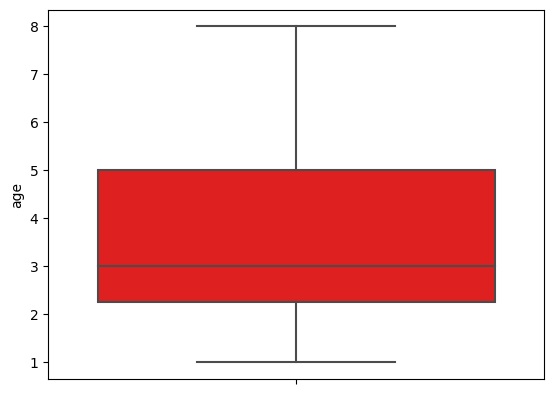

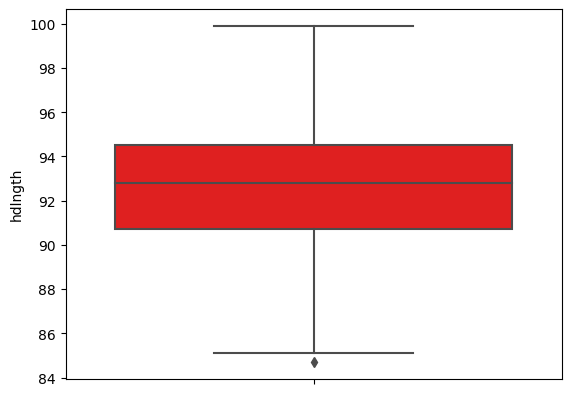

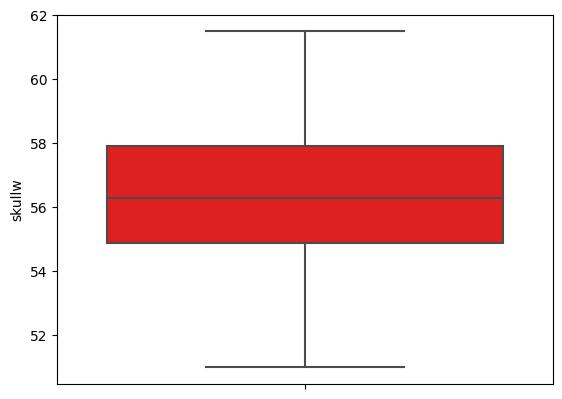

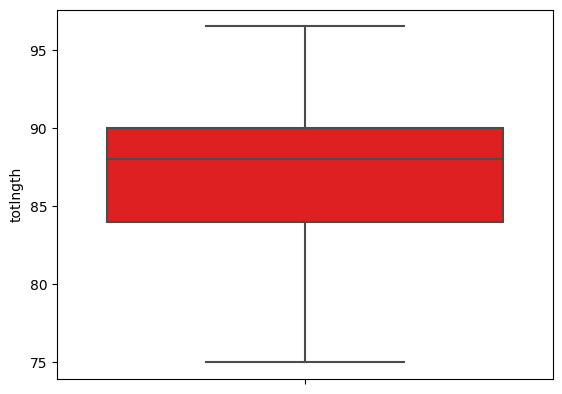

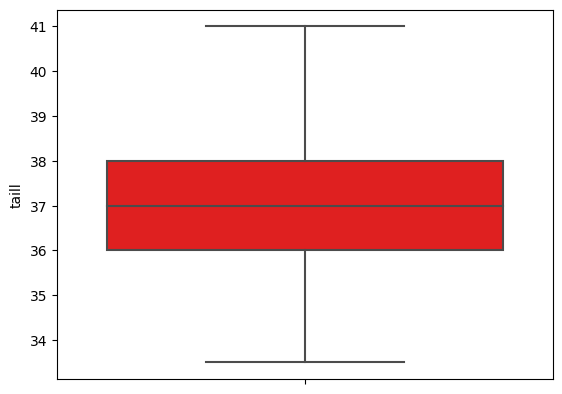

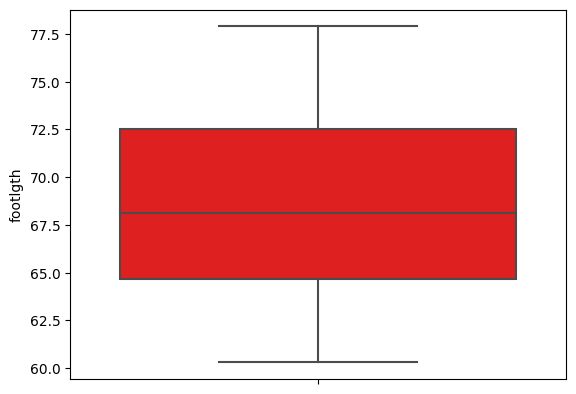

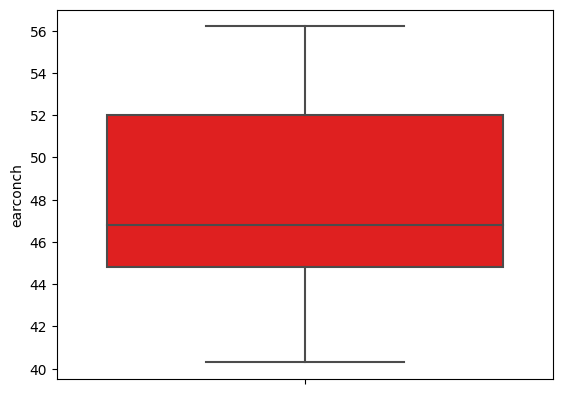

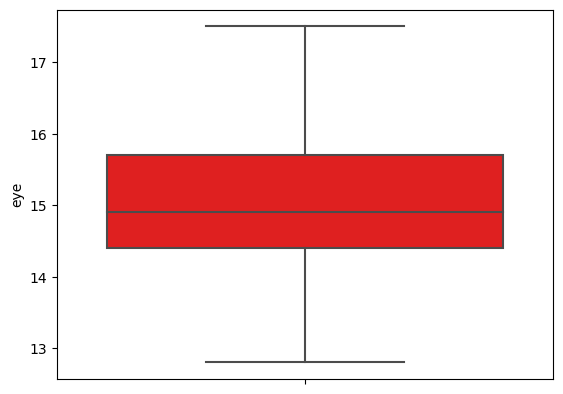

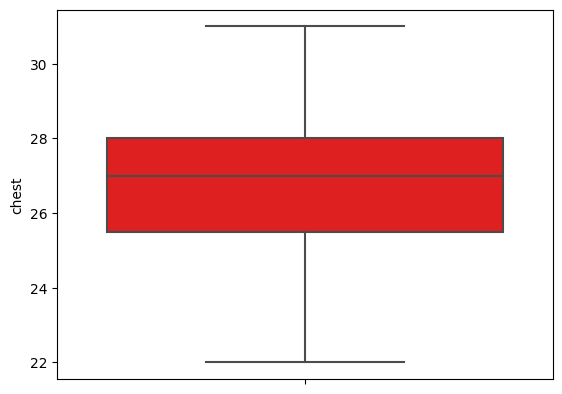

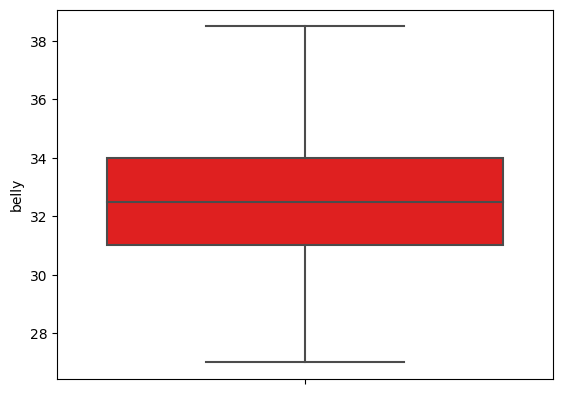

In [16]:
for i in df.columns:
    if df[i].dtype!="object":
        sns.boxplot(y=df[i],color="red")
        plt.show()

In [17]:
df.dropna(inplace=True)
df

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1.0,1.0,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2.0,1.0,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3.0,1.0,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4.0,1.0,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5.0,1.0,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100.0,7.0,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101.0,7.0,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102.0,7.0,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103.0,7.0,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [18]:
le=LabelEncoder()

In [19]:
df["Pop"]=le.fit_transform(df.Pop)

In [20]:
df["sex"]=le.fit_transform(df.sex)

In [21]:
df.sample(10)

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
100,101.0,7.0,1,1,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
89,90.0,7.0,1,1,3.0,92.6,54.6,85.0,38.5,69.8,44.8,14.5,25.5,32.5
95,96.0,7.0,1,1,4.0,94.8,55.7,83.0,38.0,66.5,47.7,14.0,25.0,33.0
61,62.0,5.0,1,0,3.0,91.3,58.0,90.5,39.0,65.5,41.3,16.0,27.0,32.0
24,25.0,1.0,0,1,3.0,95.8,58.5,91.5,35.5,72.3,51.6,14.9,31.0,35.0
46,47.0,3.0,1,1,2.0,90.1,54.8,89.0,37.5,66.0,45.5,15.0,25.0,33.0
35,36.0,2.0,0,1,7.0,93.3,59.3,88.0,35.0,74.3,52.0,14.9,25.5,36.0
32,33.0,1.0,0,1,3.0,91.4,54.6,89.0,37.0,70.8,51.8,14.8,24.0,30.0
14,15.0,1.0,0,1,5.0,92.9,57.6,85.5,34.0,69.7,51.8,15.7,28.0,35.0
22,23.0,1.0,0,0,4.0,92.5,56.1,89.0,36.0,72.8,53.3,15.4,28.0,35.0


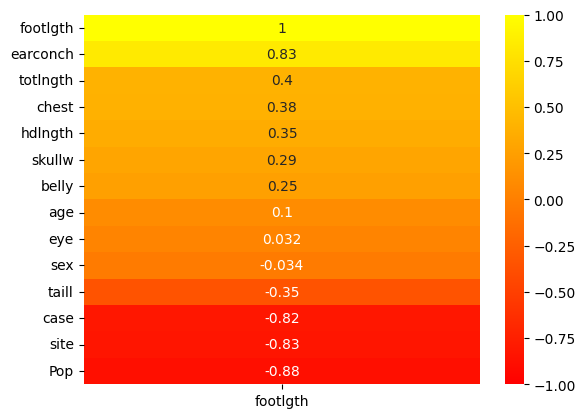

In [22]:
sns.heatmap(df.corr()[["footlgth"]].sort_values(by="footlgth",ascending=False),vmin=-1,vmax=1,annot=True,cmap="autumn");

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      86 non-null     float64
 1   site      86 non-null     float64
 2   Pop       86 non-null     int32  
 3   sex       86 non-null     int32  
 4   age       86 non-null     float64
 5   hdlngth   86 non-null     float64
 6   skullw    86 non-null     float64
 7   totlngth  86 non-null     float64
 8   taill     86 non-null     float64
 9   footlgth  86 non-null     float64
 10  earconch  86 non-null     float64
 11  eye       86 non-null     float64
 12  chest     86 non-null     float64
 13  belly     86 non-null     float64
dtypes: float64(12), int32(2)
memory usage: 9.4 KB


In [24]:
x=df[['hdlngth','skullw','totlngth','earconch','chest','belly']].values

In [25]:
y=df[['footlgth']].values

In [26]:
sc=StandardScaler()

In [27]:
x=sc.fit_transform(x)

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [29]:
models={
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "Lasso":Lasso(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "BaggingRegressor":BaggingRegressor(),
    "ExtraTreeRegressor":ExtraTreesRegressor(),
    "HistGradientBoostingregressor":HistGradientBoostingRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

In [30]:
for name,model in models.items():
    model.fit(x_train,y_train)
    print("model trained with {}".format(name))
    training_score=model.score(x_train,y_train)*100
    testing_score=model.score(x_test,y_test)*100
    score=r2_score(y_test,model.predict(x_test))*100
    mae=mean_absolute_error(y_test,model.predict(x_test))
    mse=mean_squared_error(y_test,model.predict(x_test))
    rmse=np.sqrt(mse)
    print("r2score: ",score)
    print("training_score: ",training_score)
    print("testing_score: ",testing_score)
    print("mae: ",mae)
    print("mse: ",mse)
    print("rmse_test: ",rmse)
    print("*"*100)

model trained with LinearRegression
r2score:  66.22854497178841
training_score:  76.9716402229538
testing_score:  66.22854497178841
mae:  1.64838874196541
mse:  4.459134974797551
rmse_test:  2.111666397610558
****************************************************************************************************
model trained with Ridge
r2score:  66.71949115780802
training_score:  76.95211903875068
testing_score:  66.71949115780802
mae:  1.625099885540729
mse:  4.394311137417883
rmse_test:  2.096261228334361
****************************************************************************************************
model trained with LinearSVR
r2score:  -328.89502035352047
training_score:  -134.55160994438623
testing_score:  -328.89502035352047
mae:  6.835759279476201
mse:  56.63068956244996
rmse_test:  7.525336508253299
****************************************************************************************************
model trained with Lasso
r2score:  59.87567605241531
training_score:  66.39139